In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme (color_codes= True)

In [2]:
df = pd.read_csv('Insurance.csv',sep=',',na_values=['?'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Identify missing value in the data
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


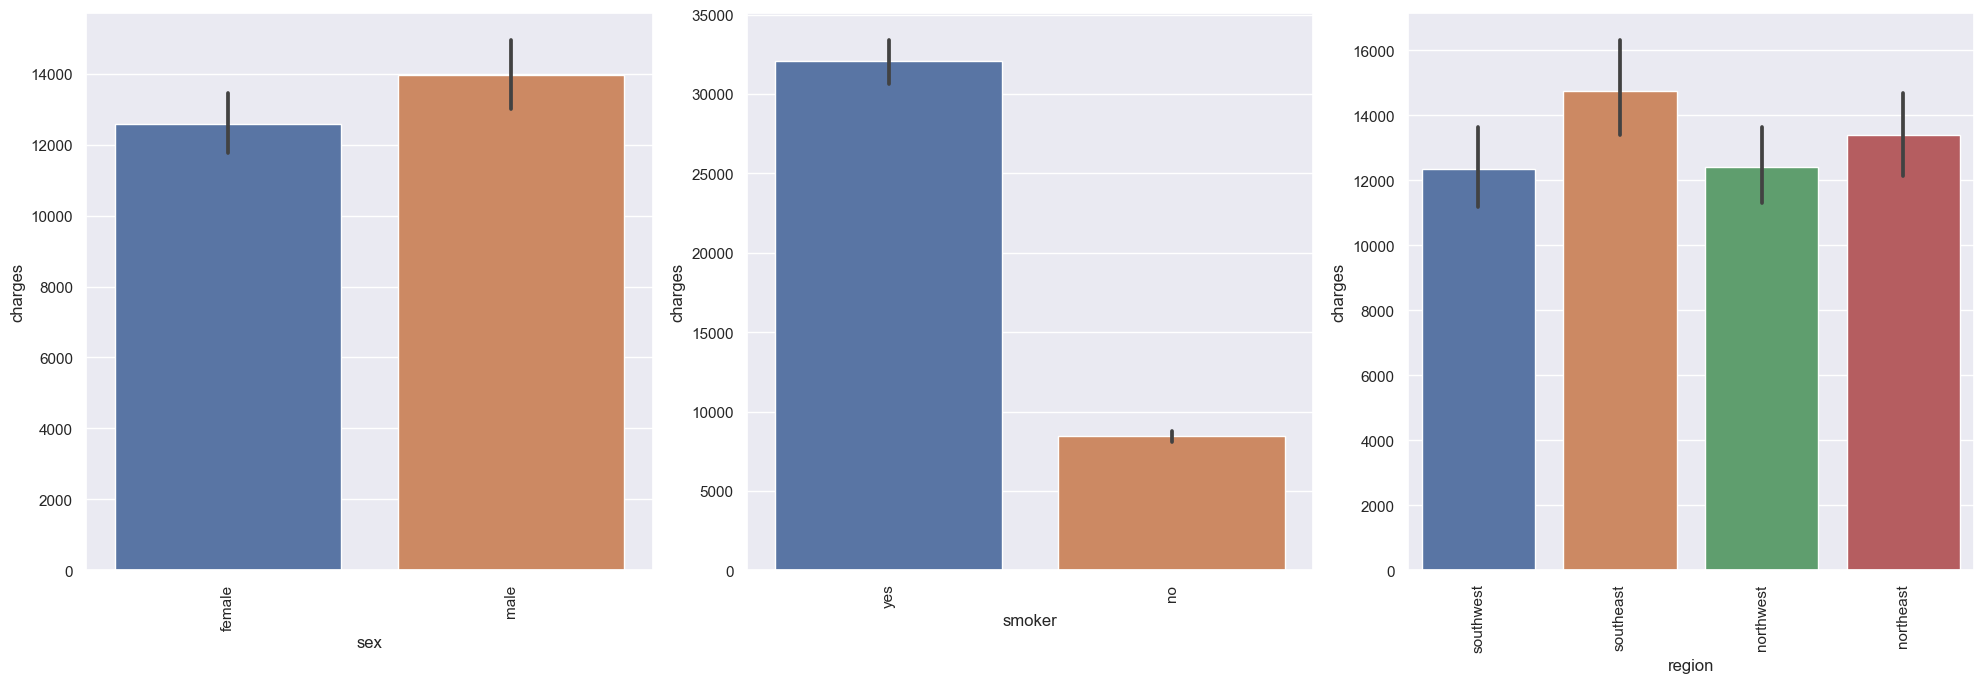

In [5]:
# List of categorical variables to plot
cat_vars= ['sex', 'smoker', 'region']
# create figure with subplots
fig, axs = plt.subplots (nrows=1, ncols=3, figsize=(20, 7))
axs = axs. flatten()
# create barplot for each categorical variable
for i, var in enumerate (cat_vars) :
    sns.barplot(x=var, y='charges', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
# adjust spacing between subplots
fig. tight_layout ()
# show plot
plt. show()

In [6]:
# Converting Categorical Features to Numerical
df1 = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df2 = df.copy()
df2.replace(df1, inplace=True)

In [7]:
df2.describe()


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


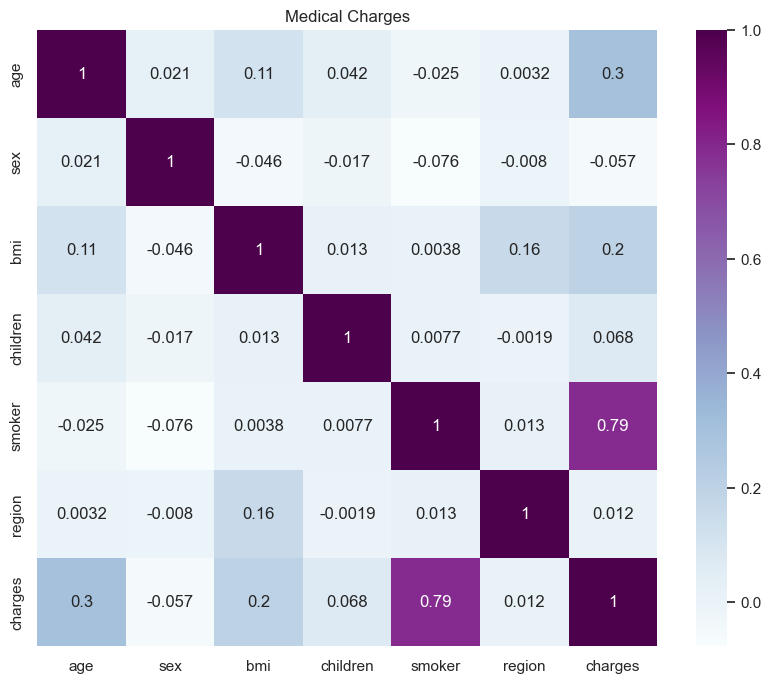

In [8]:
#Build a heatmap
corr = df2.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2g",ax=ax)
plt.title("Medical Charges")
plt.show()

In [9]:
# We can see here that Smoker, BMI and Age are most important factor that affect how much you are going to pay
# Also we see that Sex, Children and Region do not affect the Charges. (For sex 0 is for male and 1 for female)


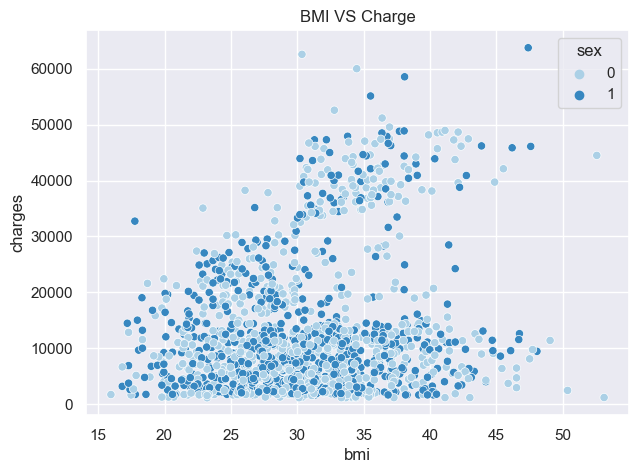

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df2, palette='Blues')
plt.title('BMI VS Charge')
plt.show()


<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

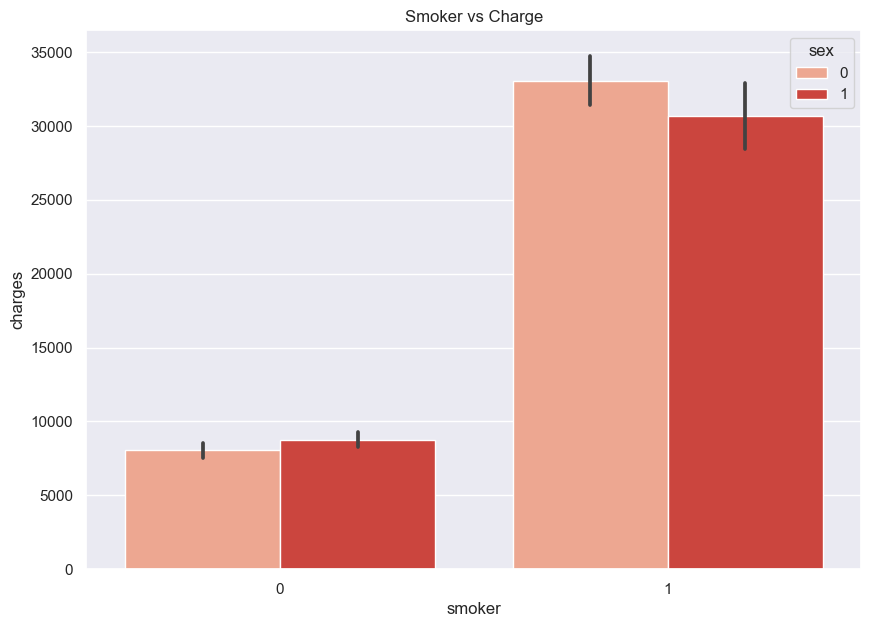

In [11]:
# (For Smoker 0 is for no and 1 for yes)
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df2,palette='Reds',hue='sex')

<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

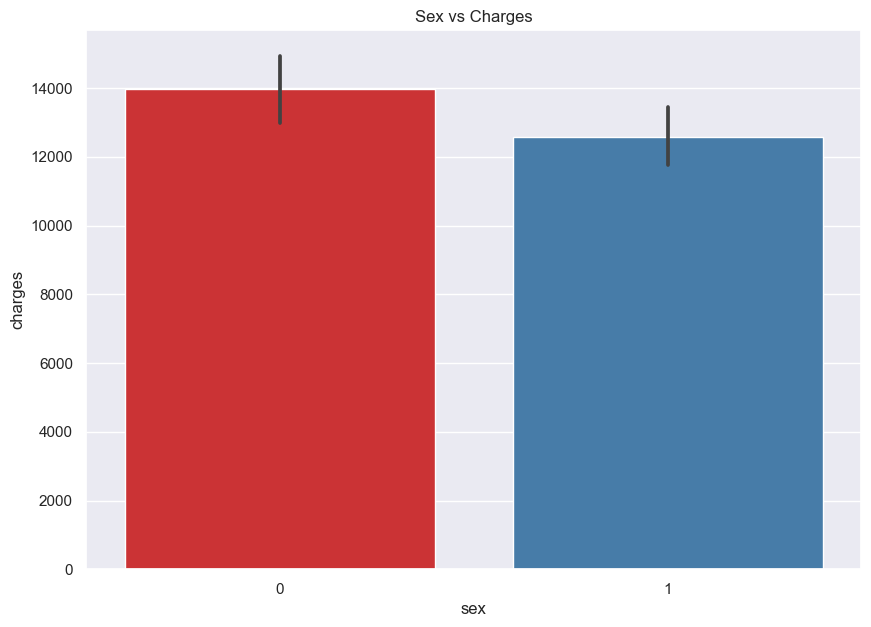

In [12]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df2,palette='Set1')

In [13]:
# Train and split
X = df2.drop('charges',axis=1).values
y = df2['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune 
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 18],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
from sklearn.tree import DecisionTreeRegressor
# Define and create a DecisionTreeRegressor with specified hyperparameters
dtree = DecisionTreeRegressor(random_state=0, max_depth=4, max_features='auto', min_samples_split=2)
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=0)

In [16]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree. predict (X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


MAE is 2697.7654305384804
MAPE is 0.33112043328852203
MSE is 21093484.004597444
R2 score is 0.8641310379678357
RMSE score is 4592.764309715603


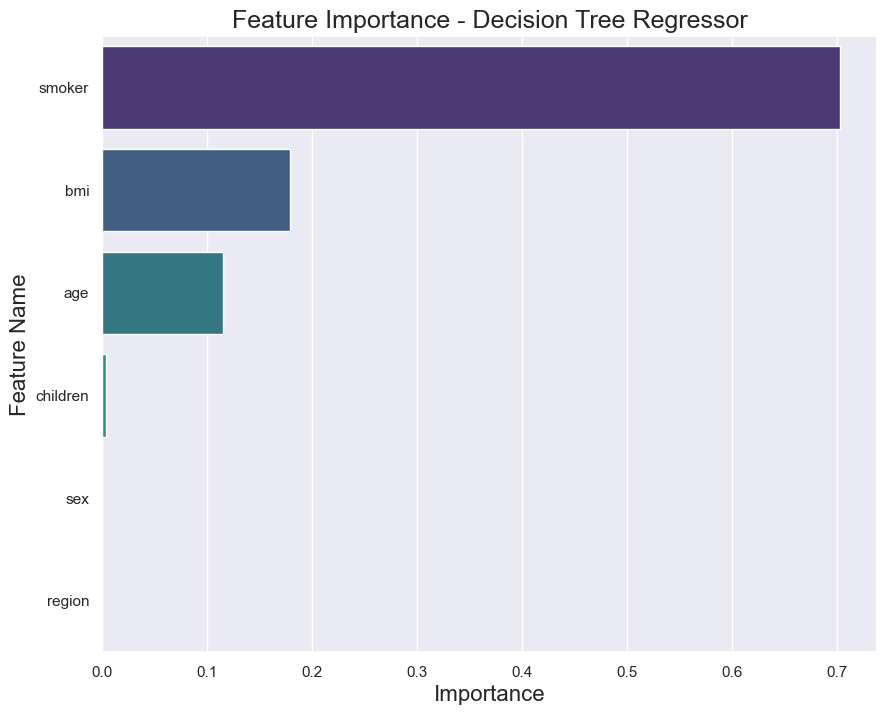

In [22]:
# Create a DataFrame with feature names and their importance values
imp_df = pd.DataFrame({
    "Feature Name": df2.drop('charges', axis=1).columns,
    "Importance": dtree.feature_importances_
})

# Sort the DataFrame by importance values in descending order
fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)  # Select the top 10 important features

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name', palette='viridis')
plt.title('Feature Importance - Decision Tree Regressor', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()


In [23]:
# Run Shap analysis
!pip install shap==0.23.0
!pip install -I shap

  Using cached shap-0.43.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (24 kB)
  Using cached numpy-1.26.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.1.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata (18 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached numba-0.58.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (2.7 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached llvmlite-0.41.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (4.8 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any

Using cached packaging-23.2-py3-none-any.whl (53 kB)
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Using cached numba-0.58.1-cp311-cp311-macosx_10_9_x86_64.whl (2.6 MB)
Using cached numpy-1.26.2-cp311-cp311-macosx_10_9_x86_64.whl (20.6 MB)
Using cached pandas-2.1.3-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)
Using cached scikit_learn-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl (10.1 MB)
Using cached scipy-1.11.4-cp311-cp311-macosx_10_9_x86_64.whl (37.2 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached llvmlite-0.41.1-cp311-cp311-macosx_10_9_x86_64.whl (31.0 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [24]:
conda install shap 

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


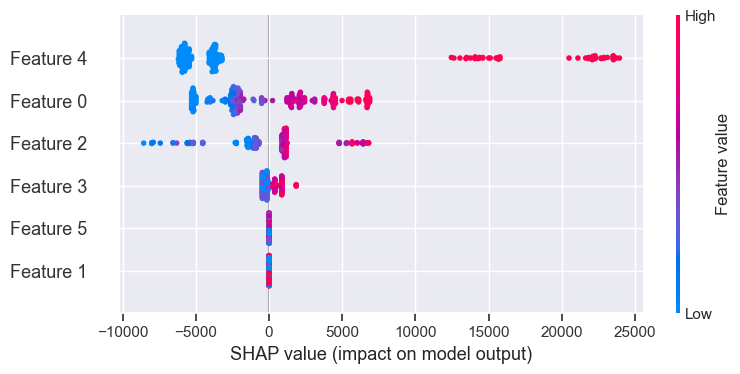

In [29]:
import shap
shap.summary_plot(shap_values,X_test)


In [27]:
shap_values.shape

(268, 6)

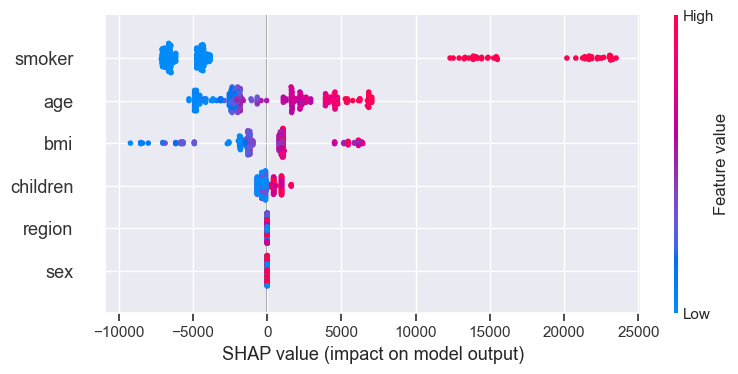

In [31]:
# Convert NumPy arrays X_train and X_test back to Pandas DataFrames
X_train_df = pd.DataFrame(X_train, columns=df2.drop('charges', axis=1).columns)
X_test_df = pd.DataFrame(X_test, columns=df2.drop('charges', axis=1).columns)

# Create a SHAP explainer with feature names
explainer = shap.Explainer(dtree, X_train_df)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_df)

# Generate summary plot based on SHAP values and test data with feature names
shap.summary_plot(shap_values, X_test_df)


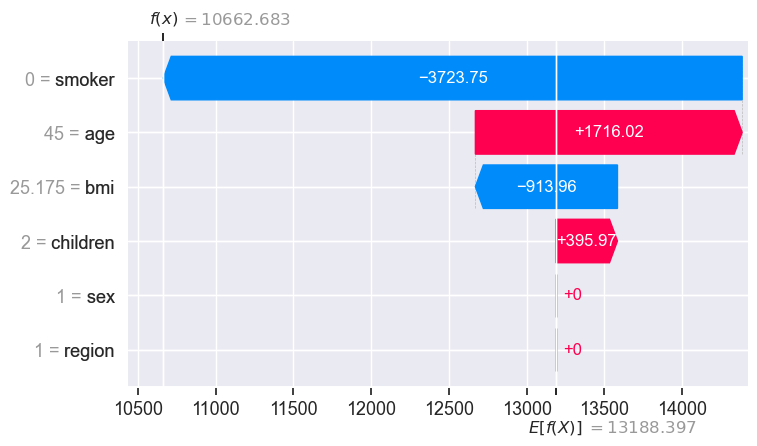

In [38]:
explainer= shap.Explainer(dtree, X_test_df)
shap_values = explainer(X_test_df)
shap.plots.waterfall(shap_values[0])